In [8]:
from hw2_utils import *
import pandas as pd     
import mcmc_fit

In [9]:
# Load data
gaia_data = pd.read_csv('gaia_hw2_data.csv')

In [10]:
# Calculate BC_G for each temperature
gaia_data["BC_G"] = calculate_bolometric_correction(gaia_data["teff_gspphot"].values)


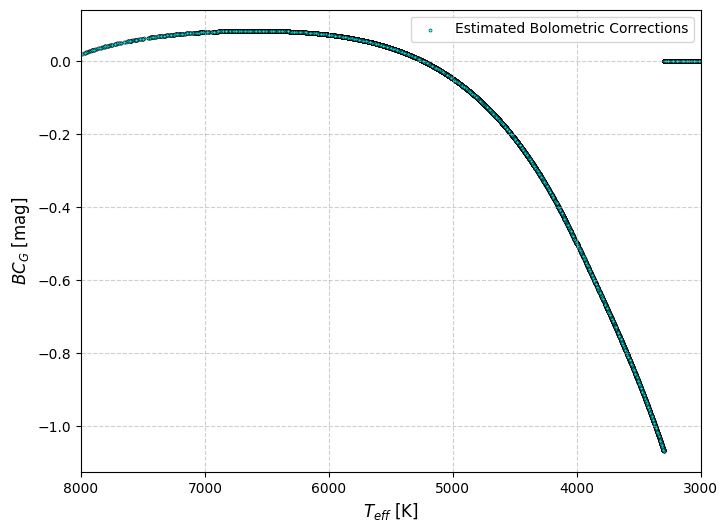

In [11]:
plot_bcg_vs_teff(gaia_data,ssize=5)

Running MCMC...


  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:21<00:00, 236.25it/s]



Fitted parameters (median ± 1-sigma):
b0 = 0.4797 (+0.0081, -0.0073)
b1 = 0.5294 (+0.0154, -0.0138)
b2 = -0.0421 (+0.0064, -0.0075)
b3 = 0.0017 (+0.0071, -0.0061)
b4 = -0.0090 (+0.0020, -0.0017)
b5 = -0.0324 (+0.0058, -0.0058)


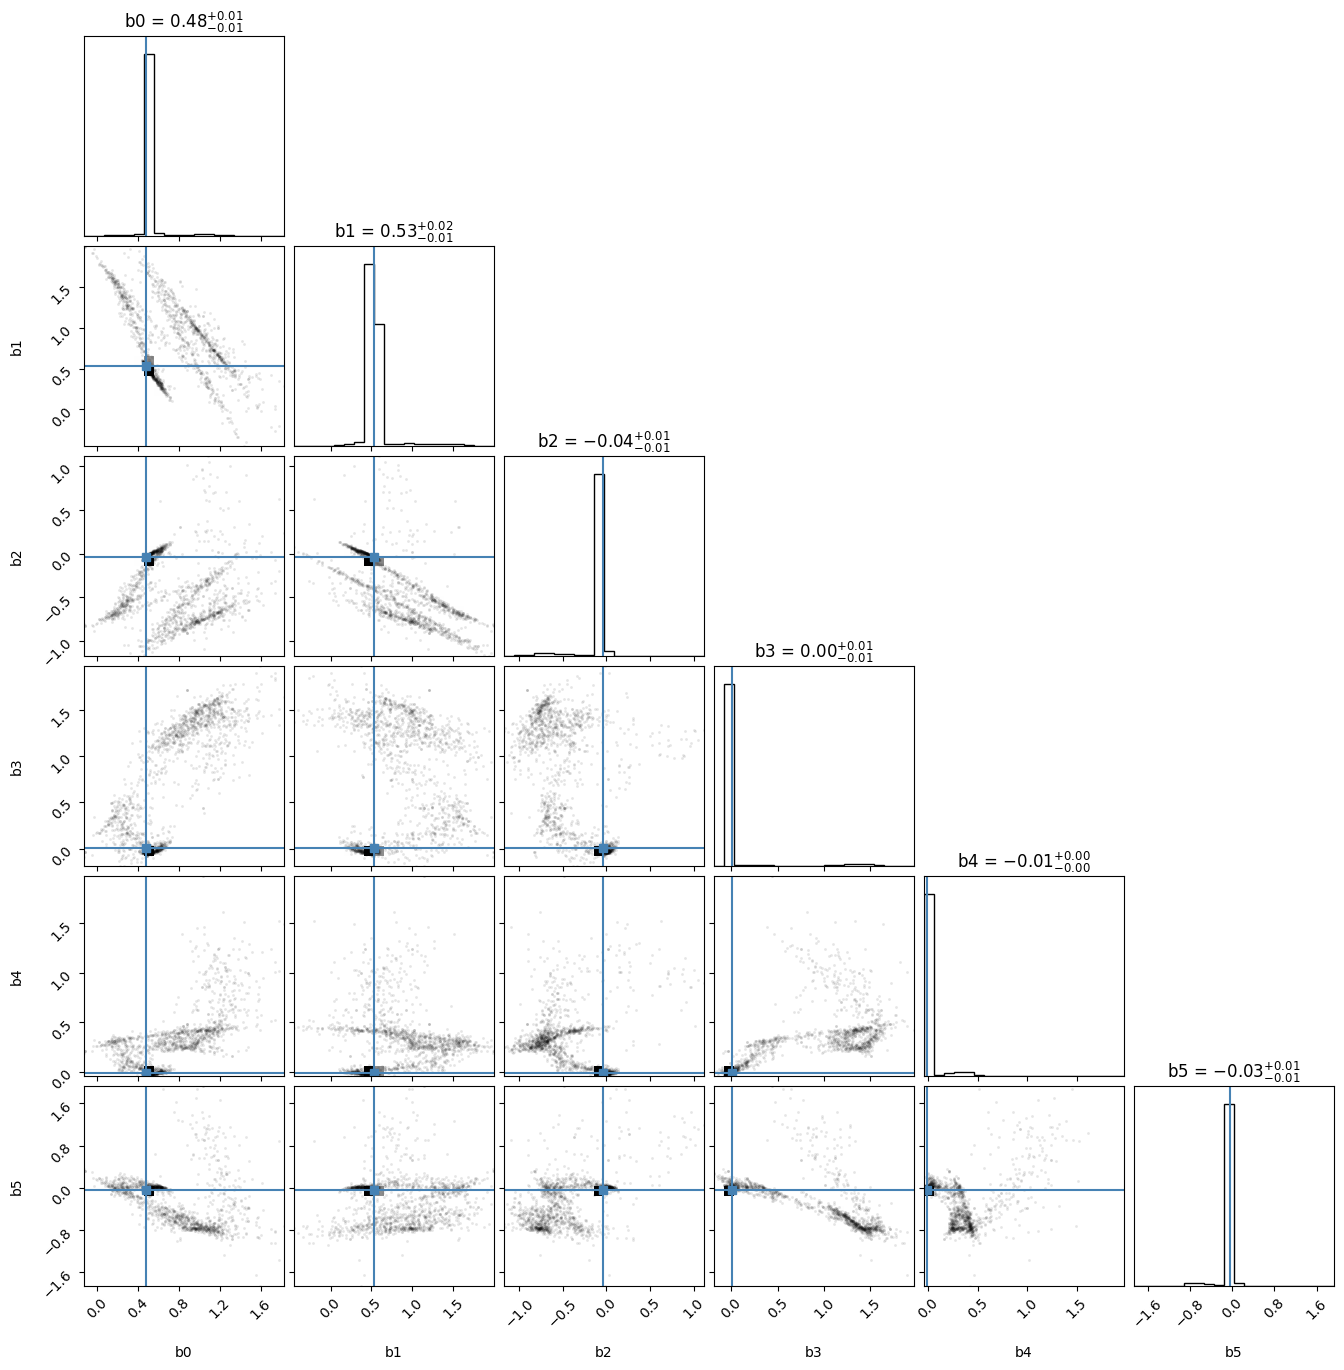

In [12]:
mcmc_fit_results = mcmc_fit.run_mcmc_fit(gaia_data,plot_mcmc_corner_plot=True,plot_fit=False)

In [13]:
nan_mask = gaia_data["mh_gspphot"].isna()

mask = (gaia_data["bp_rp"] > 0.33) & (gaia_data["bp_rp"] < 1.6)
mask &= ~nan_mask 
# Create a mask for NaN values in the 'mh_gspphot' column

filtered_data  = gaia_data[mask]
C = filtered_data["bp_rp"].values  # Color index
Fe_H = filtered_data["mh_gspphot"].values  # Metallicity
T = filtered_data["teff_gspphot"].values 

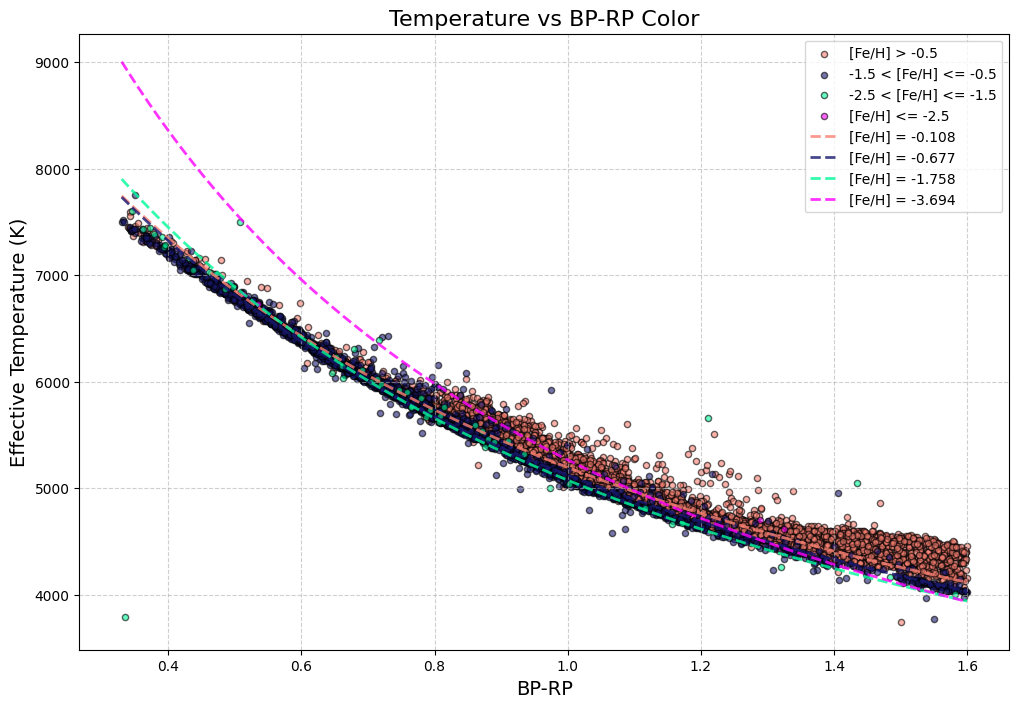

In [14]:
param_names = ["b0", "b1", "b2", "b3", "b4", "b5"]
C_fit = np.linspace(0.33, 1.6, 500)

mcmc_fit.plot_T_vs_BP_RP(filtered_data, C_fit,lw=2, results=mcmc_fit_results,param_names=param_names,savefile="T_vs_BP_RP.png")

In [15]:
# Calculating the distance in pc and absolute magnitude
gaia_data_corrected = gaia_data.copy()
gaia_data_corrected = calc_r_and_M_G(gaia_data)

# Using the results of the MCMC fit, calculate the empirical temperature
gaia_data_corrected = mcmc_fit.calc_t_empirical(gaia_data_corrected, mcmc_fit_results,param_names=param_names)

# Calculate the luminosity and radius
gaia_data_corrected = calc_luminosity_and_R(gaia_data_corrected)


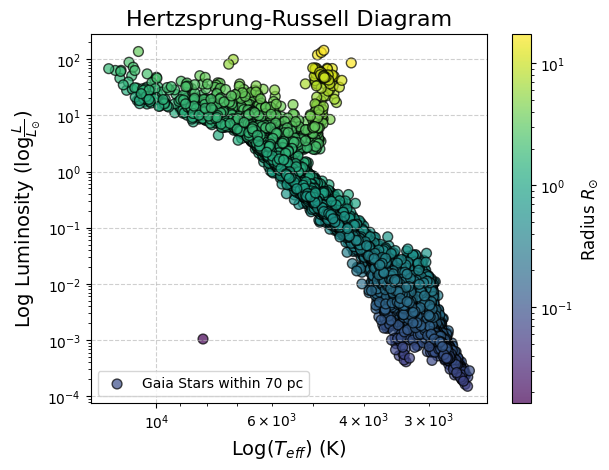

In [16]:
plot_hr_diagram(gaia_data_corrected, output_file='HR_diagram.png')

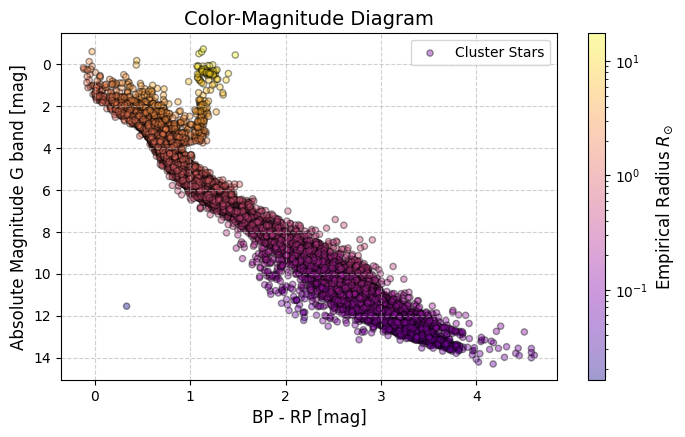

In [17]:
plot_color_magnitude_diagram(gaia_data_corrected)